<a href="https://colab.research.google.com/github/Go-Sungkyun/For-portfolio/blob/main/%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crawling

구름EDU의 30분 요약 시리즈 python의 크롤링 편 연습 및 정리


In [ ]:
!pip3 install BeautifulSoup4 
!pip3 install requests

In [5]:
import bs4 
import requests

In [6]:
# 버젼 확인
requests.__version__

'2.23.0'

In [7]:
bs4.__version__ 

'4.6.3'

### requests

In [14]:
# 크롤링 연습용 페이지
html = requests.get('http://www.paullab.co.kr/stock.html')
html

<Response [200]>

Response 200은 성공을 의미

In [15]:
html.text

'<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ko" lang="ko"><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><style type="text/css">body { width:100%; height:100%; } .wrap { position:fixed; top:50%; left:50%; margin:-185px 0 0 -315px; width:630px; height:370px; } h1 {margin: 0 0 20px; font-size: 15pt;}</style></head><body><script type="text/javascript" src="/cupid.js" ></script><script>function toNumbers(t){var e=[];return t.replace(/(..)/g,function(t){e.push(parseInt(t,16))}),e}function toHex(){for(var t=[],t=1==arguments.length&&arguments[0].constructor==Array?arguments[0]:arguments,e="",o=0;o<t.length;o++)e+=(16>t[o]?"0":"")+t[o].toString(16);return e.toLowerCase()}function getUrlParams(){var t={};return window.location.search.replace(/[?&]+([^=&]+)=([^&]*)/gi,function(e,o,r){t[o]=r}),t}var a=toNumbers("8e60689b47fb42cbc6bb0a8743ec36c5"),b=toNumbers("cfbee3827ce1fc8a7c8eda635187dfa0"),c=toNumbers("5d6a2f942b97495d741303325d69cff4"),now=new Date,time

한국어가 죄다 깨져서 나오는 것을 확인 가능. 

In [16]:
html.headers

{'Server': 'nginx', 'Date': 'Tue, 12 Jan 2021 09:59:57 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Expires': 'Thu, 01 Jan 1970 00:00:01 GMT', 'Cache-Control': 'no-cache', 'Content-Encoding': 'gzip'}

hearders를 통해 서버 종류, 시간, 인코딩 정보 등이 저장되어 있다.
해킹에도 사용 가능.

In [17]:
html.encoding

'ISO-8859-1'

In [18]:
html.encoding = 'utf-8'

In [19]:
html.text

'<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="ko" lang="ko"><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><style type="text/css">body { width:100%; height:100%; } .wrap { position:fixed; top:50%; left:50%; margin:-185px 0 0 -315px; width:630px; height:370px; } h1 {margin: 0 0 20px; font-size: 15pt;}</style></head><body><script type="text/javascript" src="/cupid.js" ></script><script>function toNumbers(t){var e=[];return t.replace(/(..)/g,function(t){e.push(parseInt(t,16))}),e}function toHex(){for(var t=[],t=1==arguments.length&&arguments[0].constructor==Array?arguments[0]:arguments,e="",o=0;o<t.length;o++)e+=(16>t[o]?"0":"")+t[o].toString(16);return e.toLowerCase()}function getUrlParams(){var t={};return window.location.search.replace(/[?&]+([^=&]+)=([^&]*)/gi,function(e,o,r){t[o]=r}),t}var a=toNumbers("8e60689b47fb42cbc6bb0a8743ec36c5"),b=toNumbers("cfbee3827ce1fc8a7c8eda635187dfa0"),c=toNumbers("5d6a2f942b97495d741303325d69cff4"),now=new Date,time

인코딩 확인 후 utf-8로 변경해줌으로써 한글 깨짐 문제를 해결.

In [20]:
html.status_code

200

In [21]:
html.ok

True

status_code랑 ok 함수로 불러오기가 성공했는지 알 수 있다.

In [23]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.paullab.co.kr/stock.html')
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html,'html.parser')

print(soup.prettify())

<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <style type="text/css">
   body { width:100%; height:100%; } .wrap { position:fixed; top:50%; left:50%; margin:-185px 0 0 -315px; width:630px; height:370px; } h1 {margin: 0 0 20px; font-size: 15pt;}
  </style>
 </head>
 <body>
  <script src="/cupid.js" type="text/javascript">
  </script>
  <script>
   function toNumbers(t){var e=[];return t.replace(/(..)/g,function(t){e.push(parseInt(t,16))}),e}function toHex(){for(var t=[],t=1==arguments.length&&arguments[0].constructor==Array?arguments[0]:arguments,e="",o=0;o<t.length;o++)e+=(16>t[o]?"0":"")+t[o].toString(16);return e.toLowerCase()}function getUrlParams(){var t={};return window.location.search.replace(/[?&]+([^=&]+)=([^&]*)/gi,function(e,o,r){t[o]=r}),t}var a=toNumbers("91834575c02c798fbebf294c2e6f4f13"),b=toNumbers("0f22e295073cbec585f39d70b7e5b3ed"),c=toNumbers("618d5903de35eaf9d2aa555

위 코드를 사용 시 html 문서 형식에 맞게, 가시성 좋게 출력할 수 있음.

In [25]:
# import requests
# from bs4 import BeautifulSoup

# response = requests.get('http://www.paullab.co.kr/stock.html')
# response.encoding = 'utf-8'
# html = response.text

# 'w'는 write을 의미
f = open('test.html', 'w', encoding='utf-8')
f.write(html)
f.close()

In [26]:
!dir

sample_data  test.html


샘플 데이터에 test.html이 추가됨.
코랩 환경에서 실행하기에 내 컴퓨터에 저장이 안됨.

파일을 다운받은 후, 해당 파일을 Atom 및 Visual Studio Code 등의 에디터를 이용 스크립트 분석이 가능.

### BeautifulSoup
* str 타입의 html 데이터를 html 구조를 가진 데이터로 가공해주는 라이브러리
* BeautifulSoup(markup, 'html.parser')
* BeautifulSoup(markup, 'lxml')
* BeautifulSoup(markup, 'lxml-xml')
* BeautifulSoup(markup, 'xml')
* BeautifulSoup(markup, 'html5lib')

http://paullab.synology.me/stock.html

해외 크롤링이 금지되어 있다.(아마도 구글 코랩으로 해서 그런듯)

이 경우 위의 주소로 크롤링을 연습한다. 

해당 사이트에 가서 `Ctrl + Shift + i` 키로 개발자 모드를 켜서`Ctrl + Shift + c`로 마우스 커서 위치의 해당하는 코드를 볼 수 있다.


In [49]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://paullab.synology.me/stock.html')

response.encoding = 'utf-8'
html= response.text

soup = BeautifulSoup(html,'html.parser')

In [46]:
soup.head

<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><style type="text/css">body { width:100%; height:100%; } .wrap { position:fixed; top:50%; left:50%; margin:-185px 0 0 -315px; width:630px; height:370px; } h1 {margin: 0 0 20px; font-size: 15pt;}</style></head>

In [50]:
soup.table

<table class="border-style" summary="시가총액 정보">
<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>
<tr>
<th scope="row">
<a class="link_site" href="#">시가총액순위<i class="fas fa-caret-right"></i></a>
</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td>위니브월드 <em id="_market_sum">1</em>위</td>
</tr>
<tr>
<th scope="row">상장주식수</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td><em id="_market_sum">5,969,782,550</em></td>
</tr>
</table>

In [51]:
soup.find('title')

<title>Document</title>

In [52]:
# tr=tablerow
soup.find('tr')

<tr>
<th class="strong" scope="row">시가총액</th>
<!-- 공백은 의도적으로 넣은 것입니다. -->
<td class="strong"><em id="_market_sum">349조 2,323</em>억원</td>
</tr>

In [54]:
soup.find(id=('update')).text

'update : 20.12.30'

In [55]:
soup.find_all('h2')

[<h2>(주)캣네생선</h2>,
 <h2 id="제주코딩베이스캠프연구원">제주코딩베이스캠프 연구원</h2>,
 <h2 id="제주코딩베이스캠프공업">제주코딩베이스캠프 공업</h2>,
 <h2 id="제주코딩베이스캠프출판사">제주코딩베이스캠프 출판사</h2>,
 <h2 id="제주코딩베이스캠프학원">제주코딩베이스캠프 학원</h2>]

객체와 함께 찾고자 하는 부분을 그냥 넣거나 find를 이용 찾을 수 있다.

find_all 이용시 해당 부분을 모두 가져온다. 이 뒤에 .[] 리스트 형태로 몇번째를 가져올지 지정도 가능.

In [ ]:
soup.find_all('table',class_='table')

In [57]:
soup.text

"\n\n\n\n\n\nDocument\n\n\n\r\n    h1{\r\n      margin: 2rem;\r\n    }\r\n    h1>span{\r\n      font-size: 1rem;\r\n    }\r\n    .main {\r\n      width: 80%;\r\n      margin: 0 auto;\r\n      text-align: center;\r\n    }\r\n\r\n    table {\r\n      width: 100%;\r\n    }\r\n\r\n    a {\r\n      color: inherit;\r\n      cursor: pointer;\r\n      text-decoration: none;\r\n    }\r\n\r\n    a:hover {\r\n      color: #000;\r\n      text-decoration: none;\r\n    }\r\n\r\n    em {\r\n      font: inherit;\r\n    }\r\n\r\n    #information {\r\n      padding: 15px;\r\n      margin-bottom: 50px;\r\n    }\r\n\r\n    #information h2 {\r\n      padding-bottom: 20px;\r\n    }\r\n\r\n    #information .wrap {\r\n      display: flex;\r\n      align-items: center;\r\n\r\n    }\r\n\r\n    #information .cat-img {\r\n      width: 70%;\r\n      padding-right: 100px;\r\n    }\r\n\r\n    #information .cat-img img {\r\n      width: 100%;\r\n      height: auto;\r\n    }\r\n\r\n    #information .tables {\r\n      

In [58]:
soup = BeautifulSoup('''
<hojun id='jeju' class='codingBaseCamp codingLevelUp'>
    hello world
</hojun>
''')
tag = soup.hojun
tag

<hojun class="codingBaseCamp codingLevelUp" id="jeju">
    hello world
</hojun>

In [59]:
type(tag)

bs4.element.Tag

In [ ]:
# 해당 객체 내 메소드 살펴보기
dir(tag)

In [62]:
tag.name

'hojun'

In [63]:
tag['class']

['codingBaseCamp', 'codingLevelUp']

In [64]:
tag['id']

'jeju'

In [65]:
tag.attrs

{'class': ['codingBaseCamp', 'codingLevelUp'], 'id': 'jeju'}

In [66]:
tag.string

'\n    hello world\n'

In [67]:
tag.text

'\n    hello world\n'

In [68]:
tag.contents

['\n    hello world\n']

In [69]:
for i in tag.children:
    print(i)


    hello world



In [70]:
tag.children

기초적인 태그 연습을 해보았으니 본격적인 태그 연습을 해보자.

In [71]:
soup = BeautifulSoup('''
<ul>
    <li id=jeju' class='codingBaseCamp codingLevelUp'>hello world</li>
    <li id=jeju' class='codingBaseCamp codingLevelUp'>hello world</li>
    <li id=jeju' class='codingBaseCamp codingLevelUp'>hello world</li>
</ul>
''')
tag = soup.ul
tag

<ul>
<li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>
<li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>
<li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>
</ul>

In [72]:
tag.contents

['\n',
 <li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>,
 '\n',
 <li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>,
 '\n',
 <li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>,
 '\n']

In [74]:
tag.contents[1]

<li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>

In [75]:
tag.li.parent

<ul>
<li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>
<li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>
<li class="codingBaseCamp codingLevelUp" id="jeju'">hello world</li>
</ul>

### Selector
* 태그에 좀 더 세밀한 접근 가능
* class 지정 시 '.'을 사용하고, id 지정 시 '#' 사용
* 탐색하고자 하는 태그가 특정태그 하위에 있을 때, '>' 사용

In [76]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://paullab.synology.me/stock.html')

response.encoding = 'utf-8'
html= response.text

soup = BeautifulSoup(html,'html.parser')

In [77]:
soup.select('#update')

[<span id="update">update : 20.12.30</span>]

In [78]:
soup.select('.table > tr')

[]

In [ ]:
soup.select('.table > tbody > tr')

사이트에 가서 확인해보면 알 수 있듯이 table 밑에 tbody가 있고 tr이 있기에, 2번에 걸쳐 하위 태그를 지정해봐야한다.

In [124]:
onestep = soup.select('.main')[2]
onestep

<div class="main">
<h2 id="제주코딩베이스캠프연구원">제주코딩베이스캠프 연구원</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date ">2019.10.23</span></td>
<td class="num "><span>6,650</span></td>
<td class="num ">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num "><span>6,590</span></td>
<td class="num "><span>6,830</span></td>
<td class="num "><span>6,580</span></td>
<td class="num "><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><spa

In [113]:
twostep = onestep.select('.table > tbody > tr')[1:]

In [125]:
twostep[0].select('td')

[<td align="center "><span class="date ">2019.10.23</span></td>,
 <td class="num "><span>6,650</span></td>,
 <td class="num ">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>,
 <td class="num "><span>6,590</span></td>,
 <td class="num "><span>6,830</span></td>,
 <td class="num "><span>6,580</span></td>,
 <td class="num "><span>398,421</span></td>]

이 중에서 우리는 날짜와 종가를 가져오고 싶다. 날자는 0번째 종가는 1번째이다.

In [126]:
twostep[0].select('td')[0].text #날짜

'2019.10.23'

In [127]:
twostep[0].select('td')[1].text #종가

# 숫자를 무언가 분석하기 위해서 ,을 공백으로 바꾸고 이후 int로 변환해야한다.

'6,650'

In [131]:
날짜 = []
종가 = []

for i in twostep:
    날짜.append(i.select('td')[0].text)
    종가.append(int(i.select('td')[1].text.replace(',','')))

In [132]:
날짜

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

In [133]:
종가

[6650,
 6630,
 6820,
 6430,
 5950,
 5930,
 5640,
 5380,
 5040,
 5100,
 5050,
 4940,
 5010,
 4920,
 5010,
 5000,
 5010,
 5060,
 5060,
 5330]

In [135]:
import plotly.express as px

fig = px.line(x=날짜, y=종가,title='jejucodingcamp')
fig.show()

# 1번 연습문제
http://paullab.synology.me/stock.html
1. 문제 1 : 각 회사별로 1만주씩 있다 가정 시, 전 그룹사 시가총액을 구하시오.
2. 문제 2 : 전그룹사 시가총액 추이를 그래프로 그려라. (x축 날짜, y축 총액)

In [136]:
import requests
from bs4 import BeautifulSoup

response = requests.get("http://paullab.synology.me/stock.html")
response.encoding = 'utf-8'

html=response.text
soup = BeautifulSoup(html, 'html.parser')

개발자 도구로 확인 결과 제목은 `id`이며 상위 클래스는 `main`이다.

`main`안에는 `table` 클래스가 그 안에는 `tbody` 그리고 `tr`이 그 안에 `td`가 있는 형태이다.

In [ ]:
soup.select('.main')[2]

In [161]:
그룹사별일일시가 = soup.select('.main')[2:]

최신시가 = []
최신시가총액 = []

for i in 그룹사별일일시가:
    최신시가.append(int(i.select('.table > tbody > tr')[1].select('td ')[3].select(
        'span')[0].text.replace(',','')))
    
최신시가

[6590, 31150, 13400, 2055]

In [166]:
최신시가총액 = [i*10000 for i in 최신시가]
최신시가총액

[65900000, 311500000, 134000000, 20550000]

In [168]:
전그룹사시가총액=format(sum(최신시가총액),',')
전그룹사시가총액

'531,950,000'

이로서 전그룹사의 가장 최신 시가총액을 구하였다.

In [185]:
시가총액 = []
for i in range(1,len(soup.select('.main')[2].select(
    '.table > tbody > tr'))):
    최신시가 = []
    for j in 그룹사별일일시가:
        최신시가.append(int(j.select('.table > tbody > tr')[i].select(
            'td ')[3].select('span')[0].text.replace(',','')))
    시가총액.append(sum(최신시가))

시가총액 = [i*10000 for i in 시가총액]

In [182]:
날짜=soup.select('.main')[2].select('.table > tbody > tr > td > .date')
날짜

[<span class="date ">2019.10.23</span>,
 <span class="date">2019.10.22</span>,
 <span class="date">2019.10.21</span>,
 <span class="date">2019.10.18</span>,
 <span class="date">2019.10.17</span>,
 <span class="date">2019.10.16</span>,
 <span class="date">2019.10.15</span>,
 <span class="date">2019.10.14</span>,
 <span class="date">2019.10.11</span>,
 <span class="date">2019.10.10</span>,
 <span class="date">2019.10.08</span>,
 <span class="date">2019.10.07</span>,
 <span class="date">2019.10.04</span>,
 <span class="date">2019.10.02</span>,
 <span class="date">2019.10.01</span>,
 <span class="date">2019.09.30</span>,
 <span class="date">2019.09.27</span>,
 <span class="date">2019.09.26</span>,
 <span class="date">2019.09.25</span>,
 <span class="date">2019.09.24</span>]

In [183]:
date = []
for i in 날짜:
    date.append(i.text)
date

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

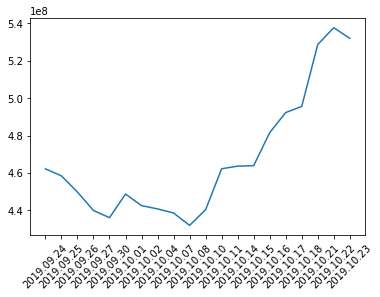

In [186]:
%matplotlib inline
import matplotlib.pyplot as plt

#현재 데이터가 날짜가 빠른순으로 되어있기에 이를 뒤집어줘야 날짜순이 된다.
plt.plot(date[::-1],시가총액[::-1]) #날짜 및 시가 뒤집기
plt.xticks(rotation=45)
plt.show()

# 2번 연습문제

* 각 그룹사별 거래량을 그래프로 그려라.(범례 포함)
* 전체 그룹사 총량을 아래와 같이 표시해라.

In [188]:
date = []
for i in 날짜:
    date.append(i.text)
date

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

In [210]:
A거래량 = soup.select('.main')[2]
B거래량 = soup.select('.main')[3]
C거래량 = soup.select('.main')[4]
D거래량 = soup.select('.main')[5]

In [211]:
len(soup.select('.main')[2].select(
    '.table > tbody > tr'))

21

In [212]:
A거래량.select('.table > tbody > tr')[1].select(
            'td ')[6].select('span')[0].text.replace(',','')

'398421'

In [218]:
A거래량.select('.table > tbody > tr')[i].select(
            'td ')[6].select('span')[0].text

'398,421'

In [ ]:
A거래량

In [230]:
A = []
for i in range(1,len(soup.select('.main')[2].select(
    '.table > tbody > tr'))):
    거래량 = int(A거래량.select('.table > tbody > tr')[i].select(
            'td ')[6].select('span')[0].text.replace(',',''))
    
    A.append(거래량)

A

[398421,
 919571,
 1678055,
 2168857,
 1982922,
 839434,
 702104,
 764800,
 134558,
 288563,
 223839,
 199580,
 188467,
 160510,
 246145,
 705046,
 408859,
 404633,
 441923,
 211019]

In [233]:

for i in A:
    누적 =[]
    누적.append(sum(A))
누적

[13067306]

In [225]:
B = []
for i in range(1,len(soup.select('.main')[3].select(
    '.table > tbody > tr'))):
    거래량 = int(B거래량.select('.table > tbody > tr')[i].select(
            'td ')[6].select('span')[0].text.replace(',',''))
    
    B.append(거래량)

B = sum(B)

In [226]:
C = []
for i in range(1,len(soup.select('.main')[4].select(
    '.table > tbody > tr'))):
    거래량 = int(C거래량.select('.table > tbody > tr')[i].select(
            'td ')[6].select('span')[0].text.replace(',',''))
    
    C.append(거래량)

C = sum(C)

In [227]:
D = []
for i in range(1,len(soup.select('.main')[5].select(
    '.table > tbody > tr'))):
    거래량 = int(D거래량.select('.table > tbody > tr')[i].select(
            'td ')[6].select('span')[0].text.replace(',',''))
    
    D.append(거래량)

D = sum(D)